# Simple Machine learning
## Train the model to convert Celcius to Fahrenheit

To prediction the value of one variable Y based on another variable X

Y is called  Dependent value
X is called Independent value

This is call "Regression"

Output = Input x weight + bais

http://playground.tensorflow.org


In **classification**, we want to classify two classes or more than two classes, 

In **regression**, we try to predict a continuous output.

To convert Celsius to Fahrenheit
Equation : Temp (F) = Temp(C) x 9/5 +32


In [1]:
from IPython.display import clear_output
# !pip install tensorflow-gpu
# !pip install psutil
# !pip install humanize
!pip install gputil

clear_output()
print("Cheers !!! - Libraries Installed")

Cheers !!! - Libraries Installed


In [2]:
#@title Code to get the GPU and RAM Details
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi

import tensorflow as tf
import psutil
import humanize
import GPUtil as GPU
import os

print("TensorFlow version: ",tf.__version__)

if tf.config.list_physical_devices('GPU'):
  print("\n|-- GPU Availalbe --|\n")
  # Print the GPU Details
  GPUs = GPU.getGPUs()
  gpu = GPUs[0]
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
  # Print details info about the GPU
  !nvidia-smi

else:
  print( "\n*** No GPU Found ***\n")

# if (tf.test.gpu_device_name().split(':')[1]) != 'GPU':
#   # print( "\n*** No GPU Found ***\n")  
#   raise TypeError("\n*** No GPU Found ***\n")    

# print("\n|-- GPU Availalbe --|\n")

# print("GPU Available: ",tf.test.is_gpu_available())
# print(tf.config.list_physical_devices('GPU'))
# print("CPU/GPU : ",tf.config.list_physical_devices())




TensorFlow version:  2.12.0

|-- GPU Availalbe --|

Gen RAM Free: 12.3 GB  | Proc size: 627.0 MB
GPU RAM Free: 15098MB | Used: 3MB | Util   0% | Total 15360MB
Tue Apr  4 02:06:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+--------

In [3]:
#@title Simple Machine Learning Model 
import matplotlib
import seaborn as sns  # To Visualize the data
import pandas as pd # To read the csv file
import numpy as np
import matplotlib.pyplot as plt # To plot the graph
from keras.models import load_model  # To load the trained model


In [4]:
#@title Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

# importing the datase
temp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Single Neuron Model/Celsius_to_Fahrenheit.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print('First 5 Rows\n')
temp_df.head(5)

First 5 Rows



,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [6]:
print('\nlast 10 Rows')
temp_df.tail(10)


last 10 Rows


,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [7]:
#@title Statistical information about the data
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [8]:
#@title Gives Summary information about the dataset
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<Axes: ylabel='Celsius'>

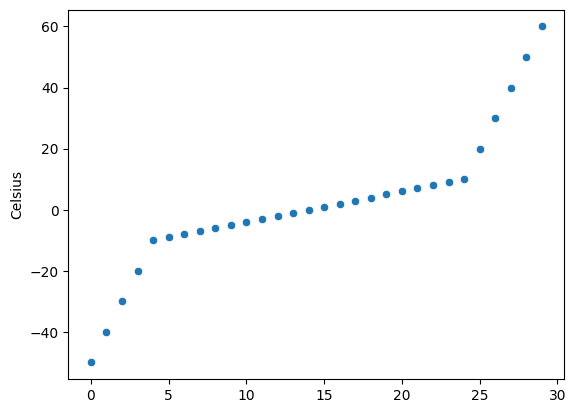

In [9]:
#@title Data Visualisation 
sns.scatterplot(temp_df['Celsius'])

<Axes: ylabel='Fahrenheit'>

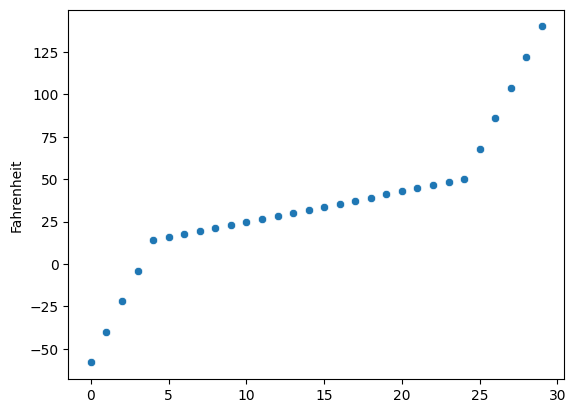

In [10]:
sns.scatterplot(temp_df['Fahrenheit'])

<Axes: >

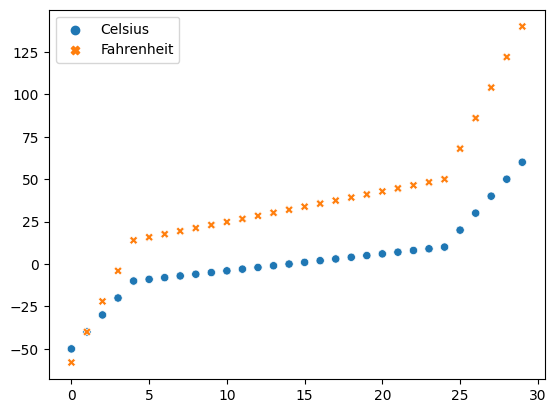

In [11]:
# sns.scatterplot(temp_df["Celsius"], temp_df["Fahrenheit"])
sns.scatterplot(temp_df)

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

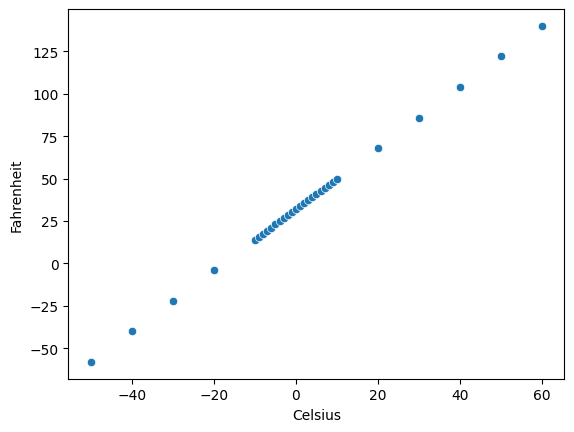

In [12]:
sns.scatterplot(x=temp_df["Celsius"], y=  temp_df['Fahrenheit'])

In [13]:
#@title Create Train and Test Dataset
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

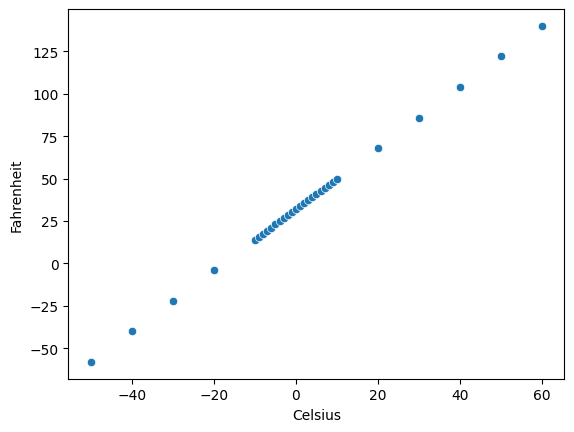

In [14]:
sns.scatterplot(x=x_train, y=  y_train)

In [15]:
x_train.shape

(30,)

In [16]:
y_train.shape

(30,)

In [58]:
#@title Creating a sequential model (layer by layer)
model = tf.keras.Sequential()

# Units - number of neuron, and 'input shape' is number of input, here we have one input.
# One neuron means one weight and one bias
# In Dense network ery neuron is connected to other neuron
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [59]:
#@title Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [60]:
#@title Run the optimizer to obtain the value of parameters, Weight and Bias

# 0.5 is learning rate, mean_squared_error = true label or the ground troops minus the network predictions, 
# loss = what tring to minimise - mean_squared_erro, take the error square it and then take the mean of all the data points.
model.compile(optimizer = tf.keras.optimizers.Adam(1), loss = 'mean_squared_error') 


In [61]:
#@title To fit the training data to the model and Train a model

epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 770ms/step - loss: 6363.6426
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 3508.8779
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1708.2760
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 898.0845
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 879.3333
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 1292.1432
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 1728.2000
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 1924.1610
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 1826.4342
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1516.0491
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 1118.8745
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 751.6065
Epoch 13/500
1/1 [=====

In [36]:
#@title Evaluate the model
epochs_hist.history.keys()

dict_keys(['loss'])

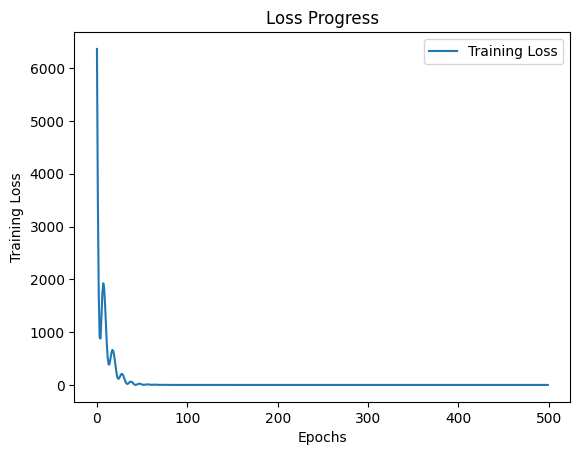

In [62]:
# Training Loss visualizarion
plt.plot(epochs_hist.history['loss'])
plt.title('Loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [63]:
model.get_weights()

# Equation = Temp (F) = Temp(C) x 9/5 +32
# array([[1.7999686]] = 9/5 
# array([32.00292] is 32

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [64]:
#@title Deploye of Trained Network to predecit the Tempreture conversion
Temp_C = 0
Temp_F = model.predict([Temp_C])
print(f'Temperature in Fahrenheit by trained AI Network : {Temp_F} ')


1/1 [==============================] - 0s 54ms/step
Temperature in Fahrenheit by trained AI Network : [[32.]] 


In [25]:
#@title Save the trained model
model.save("/content/drive/MyDrive/Colab Notebooks/1. Single Neuron Model/Celsius_to_Fahrenheit.h5")

In [26]:
#@title Load the trained model
model = load_model("/content/drive/MyDrive/Colab Notebooks/1. Single Neuron Model/Celsius_to_Fahrenheit.h5")